In [1]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [2]:
start = datetime(2015, 1, 1)
end = datetime(2020, 6, 10)

In [3]:
dis = web.DataReader('DIS', 'yahoo', start=start, end=end)

In [4]:
returns = 100 * dis.Close.pct_change().dropna()

Text(0.5, 1.0, 'DIS Returns')

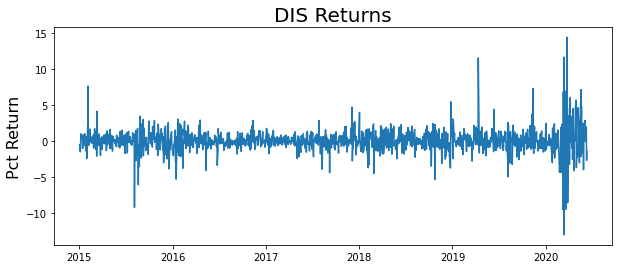

In [5]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

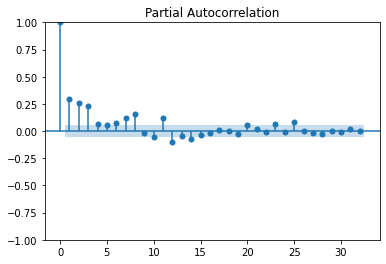

In [6]:
plot_pacf(returns**2,method='ywm')
plt.show()

In [7]:
model = arch_model(returns, p=3, q=3)

In [8]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 46076898911.536835
Iteration:      2,   Func. Count:     22,   Neg. LLF: 984596129.6219484
Iteration:      3,   Func. Count:     33,   Neg. LLF: 2734.7189172703265
Iteration:      4,   Func. Count:     43,   Neg. LLF: 2489.101779240861
Iteration:      5,   Func. Count:     53,   Neg. LLF: 2324.4207717396816
Iteration:      6,   Func. Count:     63,   Neg. LLF: 2329.7558219477614
Iteration:      7,   Func. Count:     73,   Neg. LLF: 2404.8369542345336
Iteration:      8,   Func. Count:     83,   Neg. LLF: 2408.058023368624
Iteration:      9,   Func. Count:     93,   Neg. LLF: 2300.1566207595365
Iteration:     10,   Func. Count:    102,   Neg. LLF: 2300.1919091463224
Iteration:     11,   Func. Count:    112,   Neg. LLF: 2300.0393777782447
Iteration:     12,   Func. Count:    121,   Neg. LLF: 2300.0283553491527
Iteration:     13,   Func. Count:    130,   Neg. LLF: 2300.014096882049
Iteration:     14,   Func. Count:    139,   Neg. LLF: 2

In [9]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2300.01
Distribution:                  Normal   AIC:                           4616.02
Method:            Maximum Likelihood   BIC:                           4657.80
                                        No. Observations:                 1369
Date:                Fri, Nov 19 2021   Df Residuals:                     1368
Time:                        17:50:21   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -7.2793e-03  4.324e-02     -0.168      0.866 [-9.202e-02,7.746e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5400      0.189      2.856  4.291e-03    [  0.169,  0.911]
alpha[1]       0.0681  3.930e-02      1.732  8.330e-02 [-8.964e-03,  0.145]
alpha[2]       0.2033  9.898e-02      2.054  3.995e-02  [9.335e-03,  0.397]
alpha[3]       0.3173      0.151      2.097  3.597e-02  [2.077e-02,  0.614]
beta[1]        0.0000      0.164      0.000      1.000    [ -0.321,  0.321]
beta[2]    4.8322e-14  9.645e-02  5.010e-13      1.000    [ -0.189,  0.189]
beta[3]        0.2308      0.169      1.363      0.173    [ -0.101,  0.563]
===========================================================================

Covariance estimator: robust
"""

In [10]:
model = arch_model(returns, p=3, q=0)

In [11]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3359.450640907359
Iteration:      2,   Func. Count:     16,   Neg. LLF: 39383.65598544116
Iteration:      3,   Func. Count:     24,   Neg. LLF: 233029.7975249438
Iteration:      4,   Func. Count:     31,   Neg. LLF: 321475.6066662918
Iteration:      5,   Func. Count:     38,   Neg. LLF: 24993.863523299464
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2507.0410040216257
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2447.6954003658548
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2315.966349014355
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2315.35775823293
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2315.3243922113766
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2315.2592430723553
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2315.258333711554
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2315.258310011549
Iteration:     14,   Func. Count:     95,   Neg. LLF: 2315.2

In [12]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2315.26
Distribution:                  Normal   AIC:                           4640.52
Method:            Maximum Likelihood   BIC:                           4666.63
                                        No. Observations:                 1369
Date:                Fri, Nov 19 2021   Df Residuals:                     1368
Time:                        17:50:23   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.5845e-03  3.985e-02      0.241      0.810 [-6.852e-02,8.769e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.8614      0.138      6.237  4.449e-10    [  0.591,  1.132]
alpha[1]       0.0882  4.510e-02      1.956  5.045e-02 [-1.741e-04,  0.177]
alpha[2]       0.2627  9.127e-02      2.878  4.003e-03  [8.378e-02,  0.442]
alpha[3]       0.3556      0.169      2.103  3.550e-02  [2.412e-02,  0.687]
===========================================================================

Covariance estimator: robust
"""

In [13]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1,reindex=False)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [14]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

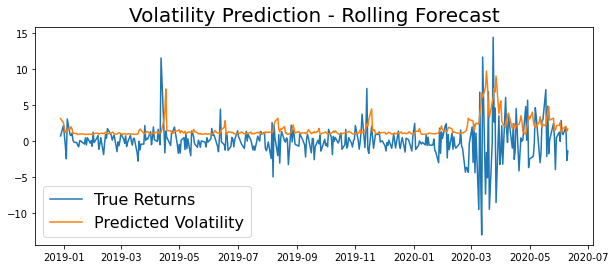

In [15]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [16]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)

In [17]:
spy = web.DataReader('Spy', 'yahoo',start=start,end=end)

In [18]:
returns= 100*spy.Close.pct_change().dropna()

Text(0.5, 1.0, 'Spy Returns')

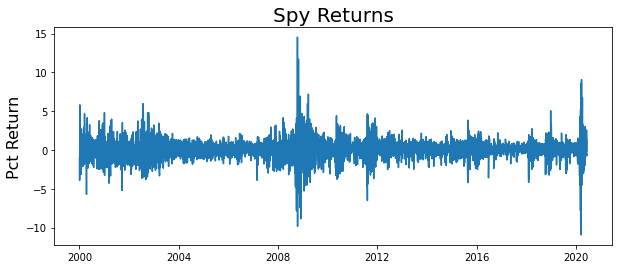

In [19]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return',fontsize=16)
plt.title('Spy Returns', fontsize=20)

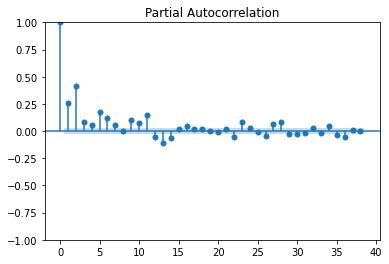

In [20]:
plot_pacf(returns**2,method='ywm')
plt.show()

In [21]:
returns = 100 * spy.Close.pct_change().dropna()

In [22]:
model = arch_model(returns,p=2,q=2)

In [23]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 96406.10214170507
Iteration:      2,   Func. Count:     20,   Neg. LLF: 55719.51984055393
Iteration:      3,   Func. Count:     31,   Neg. LLF: 11208.591582774583
Iteration:      4,   Func. Count:     40,   Neg. LLF: 15076.565831402586
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2106766157.4072833
Iteration:      6,   Func. Count:     57,   Neg. LLF: 7235.140662741964
Iteration:      7,   Func. Count:     65,   Neg. LLF: 7091.714510903267
Iteration:      8,   Func. Count:     73,   Neg. LLF: 7058.6548896198
Iteration:      9,   Func. Count:     81,   Neg. LLF: 7062.307321620529
Iteration:     10,   Func. Count:     89,   Neg. LLF: 7055.683636912976
Iteration:     11,   Func. Count:     96,   Neg. LLF: 7055.68362197199
Iteration:     12,   Func. Count:    102,   Neg. LLF: 7055.683621970993
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7055.68362197199
            Iterations: 12
  

In [24]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7055.68
Distribution:                  Normal   AIC:                           14123.4
Method:            Maximum Likelihood   BIC:                           14162.6
                                        No. Observations:                 5142
Date:                Fri, Nov 19 2021   Df Residuals:                     5141
Time:                        17:50:53   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0663  1.096e-02      6.051  1.437e-09 [4.484e-02,8.780e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0403  9.924e-03      4.063  4.837e-05 [2.087e-02,5.978e-02]
alpha[1]       0.0805  2.192e-02      3.672  2.403e-04   [3.754e-02,  0.123]
alpha[2]       0.1319  3.102e-02      4.253  2.107e-05   [7.113e-02,  0.193]
beta[1]        0.3103      0.296      1.047      0.295     [ -0.271,  0.891]
beta[2]        0.4483      0.261      1.718  8.573e-02  [-6.304e-02,  0.960]
============================================================================

Covariance estimator: robust
"""

In [25]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1,reindex=False)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [26]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

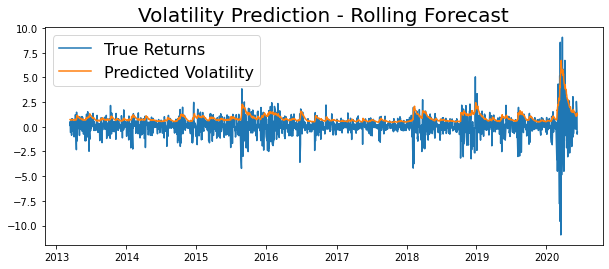

In [27]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [28]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [29]:
pred = model_fit.forecast(horizon=7,reindex=False)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

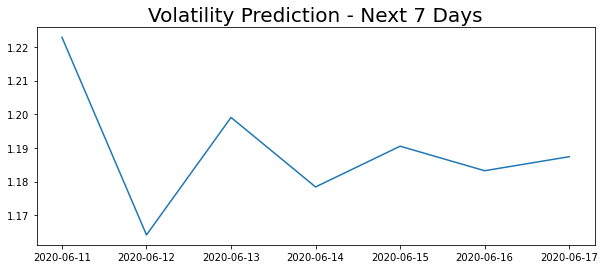

In [30]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)